# Emotion Classification Model Based on Face Expressions

#### Imports :

In [1]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator

2022-08-29 12:40:45.405525: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-29 12:40:45.405618: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### Data Distribution :

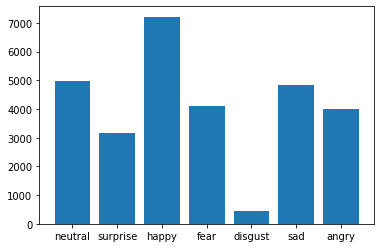

In [3]:
training_dir = "../dataset/train"
testing_dir = "../dataset/test"
categories = os.listdir(training_dir)
categories_values = []
for c in categories:
    c_train_dir = os.path.join(training_dir,c)
    c_test_dir =  os.path.join(testing_dir,c)
    categories_values.append(len(os.listdir(c_train_dir)))

plt.bar(x=categories, height=categories_values)
plt.show()

    

#### Prepare Data :

#### Building model :

In [6]:
def create_model(input_shape):
    model = models.Sequential()
    # convolutional layers
    model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=input_shape))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(64, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))
    #dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))

    return model 

#### Training Model :

In [7]:
model = create_model((150,150,1))